In [1]:
# notebook last tested with abtem version 1.0.0beta7

from abtem import __version__

print('current version:', __version__)

from ase.cluster import Decahedron

import matplotlib.pyplot as plt
from abtem import *

from cupy.fft.config import get_plan_cache

cache = get_plan_cache()
cache.set_size(0)

import os

from dask.distributed import Client

os.environ["MKL_NUM_THREADS"] = "1"

current version: 1.0.0beta22


In [2]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:


#cluster = LocalCUDACluster(memory_limit='9gb', n_workers=1)
#client = Client(cluster)


In [3]:
#from cupy.fft.config import get_plan_cache, show_plan_cache_info
#cache = get_plan_cache()
#cache.set_size(0)


In [3]:
import matplotlib.pyplot as plt
import os

from dask.distributed import Client

from ase.build import bulk
from abtem import show_atoms, FrozenPhonons, Probe, Potential, GridScan, AnnularDetector

os.environ["MKL_NUM_THREADS"] = "1"

atoms = bulk('Si', 'diamond', a=5.43, cubic=True)
atoms *= (1, 1, 1)

In [42]:
import numpy as np
from ase.io import read
import dask
from abtem.measure.detect import AnnularDetector, FlexibleAnnularDetector, PixelatedDetector
from abtem.potentials import Potential
from abtem.waves.scan import GridScan
from abtem.waves.waves import Probe
from abtem.measure import Images
from abtem.basic.dask import compute

potential = Potential(atoms, 
                      gpts=256, 
                      device='cpu', 
                      projection='infinite', 
                      slice_thickness=6)

probe = Probe(energy=100e3, semiangle_cutoff=20, device='cpu')
scan = GridScan(sampling=.5)
flexible_detector = FlexibleAnnularDetector()
#annular_detector1 = AnnularDetector(inner=50, outer=90, url='a.zarr')
annular_detector = AnnularDetector(inner=50, outer=90)
pixelated_detector = PixelatedDetector()

measurement = probe.scan(scan, [pixelated_detector], potential)

#measurement.to_zarr('f.zarr', compute=True)

a = dask.compute([measurement.as_delayed(), measurement.to_zarr('f.zarr', compute=False)])

#measurement.as_delayed().compute()

#measurement.to_zarr('c.zarr', compute=False)




#measurements.to_zarr(('a.zarr', 'b.zarr', 'c.zarr'))
#measurements = compute(measurements, scheduler='threads')

#measurements.compute()

#assert np.allclose(measurements[1].integrate_radial(50, 90).array, measurements[2].array)
#assert np.allclose(measurements[0].integrate_radial(50, 90).array, measurements[2].array)

dask.array<mean_agg-aggregate, shape=(11, 11, 117, 117), dtype=float32, chunksize=(1, 1, 117, 117), chunktype=numpy.ndarray> f.zarr



In [43]:
import zarr
with zarr.open('f.zarr', mode='r') as root:
    print(root['array'])
    

<zarr.core.Array '/array' (11, 11, 117, 117) float32 read-only>


In [44]:
from abtem.measure.measure import from_zarr
from_zarr('f.zarr')

True

In [27]:
Images.from_zarr('d.zarr').compute().array - measurement.array

[########################################] | 100% Completed |  0.1s


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x235dba98f10>)

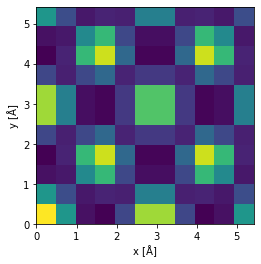

In [22]:
measurement.show()

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x235dbae7dc0>)

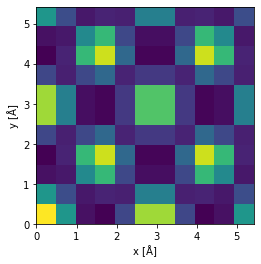

In [16]:
measurement.show()

In [18]:
import dask.array as da
import dask

a = da.zeros((10,100), chunks=10)
b = da.zeros(100)

t = da.to_zarr(a,'a.zarr',compute=False, overwrite=True)
d = da.to_zarr(b,'b.zarr',compute=False)

t.compute()

#dask.compute((t,d))

[None, None, None, None, None, None, None, None, None, None]

[########################################] | 100% Completed |  0.9s


(<AxesSubplot:xlabel='Scattering angle x [mrad]', ylabel='Scattering angle y [mrad]'>,
 <matplotlib.image.AxesImage at 0x1dba10a6e20>)

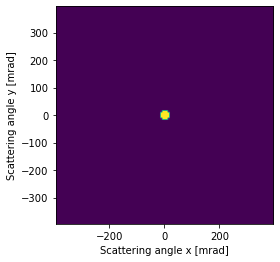

In [107]:
measurements[0].show()

In [87]:
probe.angular_sampling

(3.4083209899874527, 3.4083209899874527)

In [90]:
measurements[0]._fftshift = True

In [60]:
potential.sampling

(0.08484375, 0.08484375)

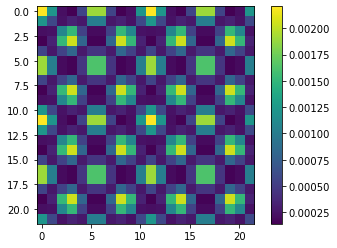

In [82]:
plt.imshow(measurements[2].array - measurements[0].integrate_radial(50, 90).array)
plt.colorbar()

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x1dba15bc850>)

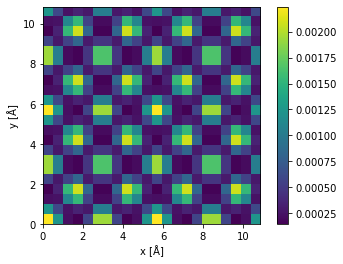

In [91]:
measurements[2].show(cbar=True)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x1dba13a5610>)

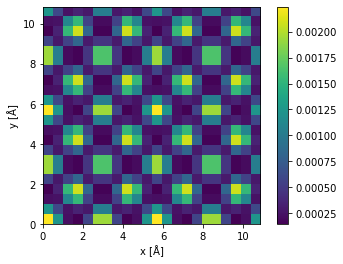

In [92]:
measurements[0].integrate_radial(50, 90).show(cbar=True)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x28d330db160>)

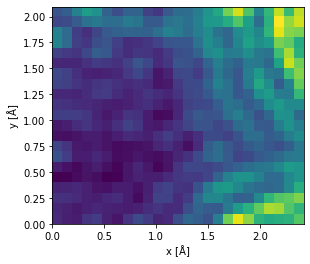

In [37]:
measurements[0].integrate_radial(50, 100).show()

In [27]:
measurements[0].integrate_radial(20, 40).array - measurements[2].array

array([[-0.00346929, -0.00346243, -0.00345778, -0.00345588, -0.00345647,
        -0.00346041, -0.00345796, -0.00345749],
       [-0.00345927, -0.00346369, -0.00346279, -0.00346214, -0.00346279,
        -0.0034638 , -0.00346637, -0.00346392],
       [-0.00346094, -0.0034591 , -0.00345707, -0.00345784, -0.00346237,
        -0.00346243, -0.00345391, -0.00345159],
       [-0.00346762, -0.00346035, -0.00345659, -0.00346106, -0.00346845,
        -0.0034638 , -0.00345582, -0.00345629],
       [-0.00345808, -0.00346172, -0.00345999, -0.00346369, -0.00346243,
        -0.00345898, -0.00345641, -0.00345618],
       [-0.00346529, -0.0034619 , -0.00345987, -0.00345659, -0.00345749,
        -0.00345558, -0.0034399 , -0.00345391],
       [-0.00344867, -0.00345546, -0.0034638 , -0.00347215, -0.00348336,
        -0.00346243, -0.00345236, -0.00343996],
       [-0.00346446, -0.00345993, -0.003452  , -0.00345105, -0.00344247,
        -0.00344926, -0.0034315 , -0.00340044],
       [-0.00345755, -0.00346529

In [28]:
measurements[2].array

array([[0.51589483, 0.51590025, 0.51589924, 0.51590794, 0.5159314 ,
        0.51591855, 0.51586217, 0.5158875 ],
       [0.51592624, 0.5159409 , 0.51593715, 0.51591885, 0.51594055,
        0.5159304 , 0.51586974, 0.51586676],
       [0.5159257 , 0.5159395 , 0.5159318 , 0.5159087 , 0.5159228 ,
        0.51589614, 0.51583004, 0.515826  ],
       [0.5159031 , 0.5159242 , 0.5159234 , 0.51588845, 0.515883  ,
        0.51584744, 0.51576734, 0.5158591 ],
       [0.51588625, 0.5159014 , 0.5158951 , 0.5159124 , 0.51588005,
        0.5158297 , 0.515882  , 0.5161364 ],
       [0.515863  , 0.51587677, 0.5158913 , 0.5158736 , 0.51586646,
        0.5158038 , 0.5157728 , 0.5166065 ],
       [0.51589143, 0.51590204, 0.5159072 , 0.51586705, 0.5158813 ,
        0.5157769 , 0.5159626 , 0.51659024],
       [0.51587826, 0.5158818 , 0.5158553 , 0.51578104, 0.5157827 ,
        0.5156683 , 0.5158138 , 0.5165937 ],
       [0.51588523, 0.5158789 , 0.51585066, 0.51581085, 0.5157479 ,
        0.51568246, 0.515519

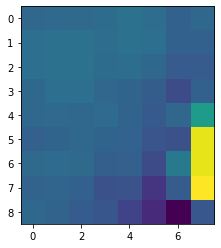

In [30]:
plt.imshow(measurements[0].integrate_radial(20, 40).array)

In [ ]:
measurements[]

In [3]:
client = Client()
client.restart()

Client Scheduler: tcp://127.0.0.1:64024 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 31.93 GiB


In [34]:
% % time

frozen_phonons = FrozenPhonons(atoms, 2, {'Au': .1}, directions='xyz')
potential = Potential(frozen_phonons, gpts=256, device='cpu', projection='infinite', slice_thickness=10,
                      precalculate=False)

probe = Probe(energy=100e3, semiangle_cutoff=20, device='cpu')
probe.grid.match(potential)

scan = GridScan((0, 0), (potential.extent[0], potential.extent[1]), sampling=probe.ctf.nyquist_sampling)

detectors = [AnnularDetector(50, 90, to_cpu=True)]
#FlexibleAnnularDetector(to_cpu=True),
#SegmentedDetector(inner=0, outer=30, nbins_radial=1, nbins_azimuthal=1, to_cpu=True),
#PixelatedDetector(max_angle=70, to_cpu=True)]

measurements = probe.scan(scan, detectors, potential, chunks=20)

Wall time: 24.1 ms


In [35]:
measurements[0].array

dask.array<mean_agg-aggregate, shape=(36, 35), dtype=float32, chunksize=(4, 4), chunktype=numpy.ndarray>

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x2d5a970c490>)

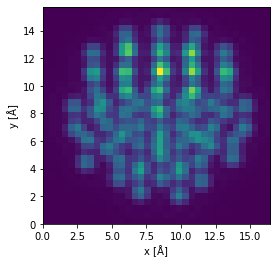

In [36]:
measurements[0].show()

(<AxesSubplot:xlabel='Scattering angle x [mrad]', ylabel='Scattering angle y [mrad]'>,
 <matplotlib.image.AxesImage at 0x25eb0f51700>)

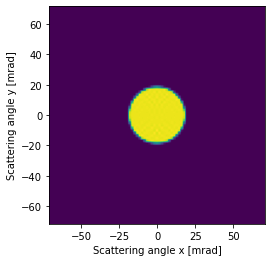

In [18]:
measurements_4d[0, 0].show()

In [10]:
measurements_com.compute()

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x2a775ccacd0>)

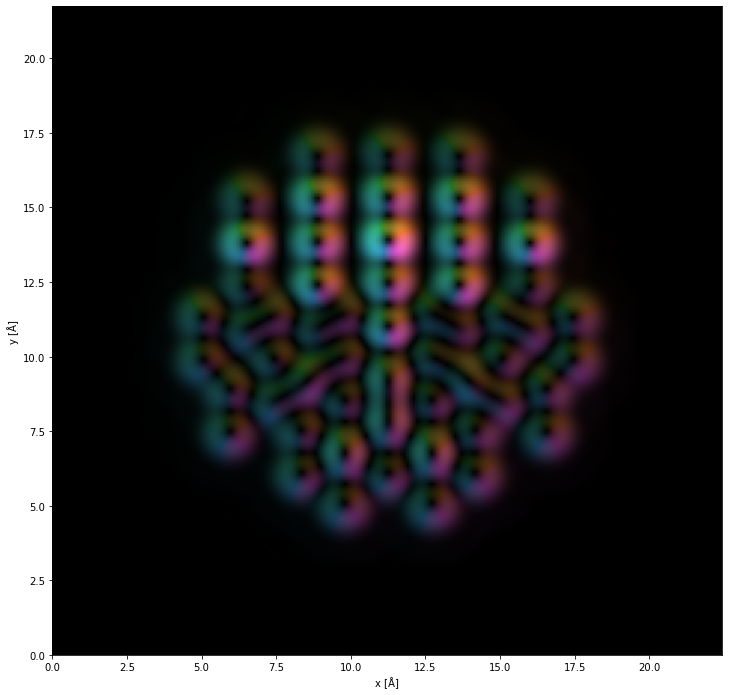

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
measurements_com.interpolate(.1).show(ax)